## Neural Network using TensorFlow

In [ ]:
# importing deep learning libraries
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
# hello world dataset for DL - mnist dataset
# mnist dataset which has hand-written digits [0-9], each image of 28X28 size
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


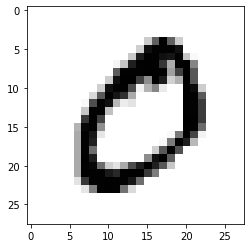

In [ ]:
# plotting a single image
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap = plt.cm.binary) #cmap --> to give a black & white view
plt.show()

#### Feature Scaling: Normalization

In [ ]:
print(x_train.shape)
# Normalization to convert values between 0 & 1

(60000, 28, 28)


In [ ]:
# 60000 training examples
# each image with size 28 * 28

In [ ]:
# Normalizing to convert the value between [0,1]
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#### Building the Model: Two types of keras models
* Sequential: allows us to create model, layer-by-layer
* Functional: 

In [ ]:
# Building sequential model
model = tf.keras.models.Sequential()

# adding input layer with 1d vector
# activation function --> relu helps to overcome exploding and vanishing gradient problem
model.add(tf.keras.layers.Flatten()) # flatten converts multi-dimensional array into 1-D
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # first hidden layer with 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 2nd hidden layer with 128 neurons
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer

model.compile(optimizer='adam', # other optimizer - SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
              loss='sparse_categorical_crossentropy', # how will we calculate our "error." Neural network aims to minimize loss.
              metrics = ['accuracy'])

#training model
model.fit(x_train, y_train, epochs = 10)

#### [Activation Functions](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/)
* Binary Step
* Linear
* Sigmoid
* Tanh
* ReLU
* Leaky ReLU
* Parameterised ReLU
* Exponential Linear Unit
* Swish
* Softmax

#### When to use which activation function (no rule of thumb):
* Sigmoid functions and their combinations generally work better in the case of classifiers
* Sigmoids and tanh functions are sometimes avoided due to the vanishing gradient problem
* sigmoid is widely used for binary classification problems. The softmax function can be used for multiclass classification problems
* ReLU function is a general activation function and is used in most cases these days
* If we encounter a case of dead neurons in our networks the leaky ReLU function is the best choice
* Always keep in mind that ReLU function should only be used in the hidden layers
* As a rule of thumb, you can begin with using ReLU function and then move over to other activation functions in case ReLU doesn’t provide with optimum results

#### Loss Functions
##### Probabilistic losses
    * BinaryCrossentropy class
    * CategoricalCrossentropy class
    * SparseCategoricalCrossentropy class
    * Poisson class
    * binary_crossentropy function
    * categorical_crossentropy function
    * sparse_categorical_crossentropy function
    * poisson function
    * KLDivergence class
    * kl_divergence function
## Regression losses
    * MeanSquaredError class
    * MeanAbsoluteError class
    * MeanAbsolutePercentageError class
    * MeanSquaredLogarithmicError class
    * CosineSimilarity class
    * mean_squared_error function
    * mean_absolute_error function
    * mean_absolute_percentage_error function
    * mean_squared_logarithmic_error function
    * cosine_similarity function
    * Huber class
    * huber function
    * LogCosh class
    * log_cosh function

### Optimizers
* GD [complexity: low, computation: High]
* SGD [complexity: low, computation: Low]
* SGD + momentum [complexity: medium, computation: low]
* Adam [complexity: high, computation: High] [Tutorial](https://www.youtube.com/watch?v=izK7In-WLnI&list=PLmPJQXJiMoUVvvzXCBKSt0aA8A5NlryjV&index=15)
* Adadelta,
* Adagrad [complexity: high, computation: medium] 
  * Here learning rate is not fixed. Instead it changes based on the pace and direction we should move to optimize Loss function. The closer we are to optimization, the smaller we take learning rate. There is a problem when denominator is very large, hardly any learning takes place. Solution is RMSprop.
* RMSprop [complexity: high, computation: High] 
  * Similar to Adagrad, just is able to successfully control denominator by using weighted sum in denominator
* Adamax,
* Nadam,
* Ftrl

#### Calculating Validation: to check overfitting

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1075 - accuracy: 0.9740
0.10746809095144272 0.9739999771118164


#### Saving model

In [ ]:
# Saving the model
model.save('mnist_adam_optimizer_model')

INFO:tensorflow:Assets written to: mnist_adam_optimizer_model/assets


In [ ]:
# loading the saved model
same_model = tf.keras.models.load_model('mnist_adam_optimizer_model')
predictions = same_model.predict([x_test])

In [ ]:
import numpy as np
np.argmax(predictions[0])

7

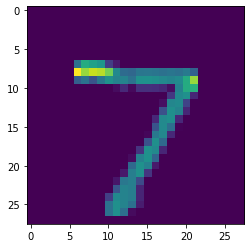

In [ ]:
plt.imshow(x_test[0])

## Neural Netorks using Keras

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# loading data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Normalizing to convert the value between [0,1]
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# defining keras model
keras_model = Sequential() # initializing model
keras_model.add(tf.keras.layers.Flatten())
# keras_model.add(Dense(12, input_dim=8, activation='relu)) --> incase the input was from some file with 8 features
keras_model.add(Dense(120, activation='relu')) # hidden layer
keras_model.add(Dense(10, activation='sigmoid')) # sigmoid is useful for classifcation problems; output layer



In [ ]:
# compiling the model
keras_model.compile(optimizer='adam', # other optimizer - SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
              loss='sparse_categorical_crossentropy', # how will we calculate our "error." Neural network aims to minimize loss.
              metrics = ['accuracy'])

In [ ]:
# fitting the model: mini-batch size
keras_model.fit(x_train, y_train, epochs = 150, batch_size=6000)

In [ ]:
# test accuracy
test_loss, test_acc = keras_model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0950 - accuracy: 0.9721
0.10746809095144272 0.9739999771118164


### Hyper-parameter tuning in NN
* Number of neurons in hidden layers
* Batch & Epoch
* Optimization Algorithm
* Learning Rate and Momentum in SGD
* Weight initialization
* Activation Functions

In [ ]:
# Importing necessary packages
import numpy
import pandas as pd

from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# loading data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing to convert the value between [0,1]
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# Function to create model for KerasClassifier
def create_my_model():
  # defining keras model
  keras_model = Sequential() # initializing model
  keras_model.add(tf.keras.layers.Flatten())
  # keras_model.add(Dense(12, input_dim=8, activation='relu)) --> incase the input was from some file with 8 features
  keras_model.add(Dense(120, activation='relu')) # hidden layer
  keras_model.add(Dense(10, activation='sigmoid')) # sigmoid is useful for classifcation problems; output layer

  # compiling the model
  keras_model.compile(optimizer='adam', # other optimizer - SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
                loss='sparse_categorical_crossentropy', # how will we calculate our "error." Neural network aims to minimize loss.
                metrics = ['accuracy'])
  
  return keras_model

In [ ]:
## creating model
model = KerasClassifier(build_fn = create_my_model)

#### Optimizing Batch_size and epochs

In [ ]:
param_grid = {'batch_size': [500, 1000, 10000, 5000, 25000], 'epochs': [20, 50, 75, 100]}

grid_model = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, cv=3)
grid_result = grid_model.fit(x_train, y_train)

In [ ]:
# summarizing results
print(grid_result.best_score_)
print()
print(grid_result.best_params_)
print(grid_result.best_estimator_)

0.9691999951998392

{'batch_size': 500, 'epochs': 100}


In [ ]:
epochs = grid_result.best_params_['epochs']
batch_size = grid_result.best_params_['batch_size']

#### Optimizing **optimizer function**

In [ ]:
# Function to create model for KerasClassifier
def create_my_model(optimizer='adam'):
  # defining keras model
  keras_model = Sequential() # initializing model
  keras_model.add(tf.keras.layers.Flatten())
  # keras_model.add(Dense(12, input_dim=8, activation='relu)) --> incase the input was from some file with 8 features
  keras_model.add(Dense(120, activation='relu')) # hidden layer
  keras_model.add(Dense(10, activation='sigmoid')) # sigmoid is useful for classifcation problems; output layer

  # compiling the model
  keras_model.compile(optimizer= optimizer, # other optimizer - SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
                loss='sparse_categorical_crossentropy', # how will we calculate our "error." Neural network aims to minimize loss.
                metrics = ['accuracy'])
  
  return keras_model

In [ ]:
## creating model
model = KerasClassifier(build_fn = create_my_model, epochs = epochs, batch_size = batch_size)

In [ ]:
param_grid = {'optimizer': ['SGD', 'Adadelta', 'RMSprop', 'Adagrad', 'Adam']}

grid_model = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, cv=3)
grid_result = grid_model.fit(x_train, y_train)

In [ ]:
# summarizing results
print(grid_result.best_score_)
print()
print(grid_result.best_params_)
print(grid_result.best_estimator_)

0.9695333242416382

{'optimizer': 'RMSprop'}
